# Analyse des salaires des athletes

Nous avons à notre disposition un fichier qui présente la liste des Athlètes les mieux payés aux cours de plusieurs années.

Le but du projet est d'analyser les tendances et de mieux comprendre les sport les mieux payés et les pays les plus représenter. Ce projet nous permettra de mieux manipuler l'outils pandas et de faire des analyses pousées

Au cours de notre analyse, nous utiliserons la structure ci-après

- Collecte
- Analyse exploratoire (analyse univarié, multivarié)
- Test d'hypothèse
- Nettoyage des données si nécessaire.
  

In [27]:
import numpy as np     
import pandas as pd     
import seaborn as sns  
import matplotlib.pyplot as plt  

Lecture du fichier

In [28]:
salaires_athletes = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv",index_col="S.NO") 

In [29]:
salaires_athletes

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...
297,Stephen Curry,USA,6,9,Basketball,2020,74.4
298,Kevin Durant,USA,7,10,Basketball,2020,63.9
299,Tiger Woods,USA,8,11,Golf,2020,62.3


In [30]:
salaires_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1 to 301
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


Voyons plus en détaille les donées de notre Dataset.

In [31]:
salaires_athletes.head()


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


ANALYSE EXPLORATOIRE

Nous allons débuté l'analyse par les athlète présent dans notre Dataset.

In [32]:
salaires_athletes.Name.unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

In [33]:
salaires_athletes.Name.value_counts()

Name
Michael Jordan        19
Tiger Woods           19
Kobe Bryant           14
Michael Schumacher    13
LeBron James          13
                      ..
Canelo Alvarez         1
Russell Wilson         1
Aaron Rogers           1
Kirk Cousins           1
Carson Wentz           1
Name: count, Length: 82, dtype: int64

Nous allons analyser à présent les nationalité des athlètes.

In [34]:
salaires_athletes.Nationality.unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

pour une meuilleure présentation nous allons présenter un diagramme qui réprésente la répartition des pays.

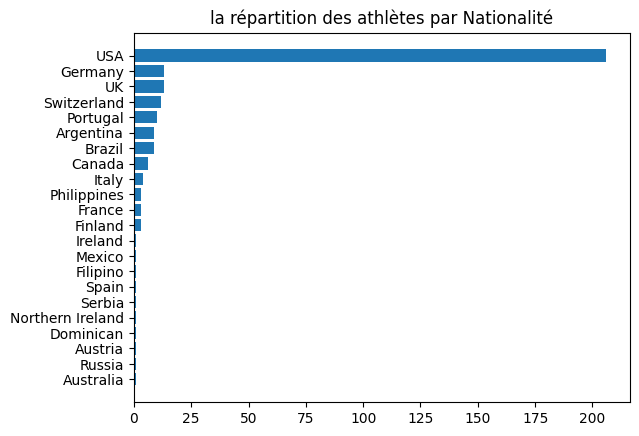

In [35]:
plt.barh(salaires_athletes.Nationality.value_counts().sort_values().index,salaires_athletes.Nationality.value_counts().sort_values())
plt.title('la répartition des athlètes par Nationalité')

plt.show()


In [36]:
salaires_athletes


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...
297,Stephen Curry,USA,6,9,Basketball,2020,74.4
298,Kevin Durant,USA,7,10,Basketball,2020,63.9
299,Tiger Woods,USA,8,11,Golf,2020,62.3


Nous allons voir les sports les plus présent dans le dataset

In [37]:
salaires_athletes.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

Nous remarquons que pour certaines categories nous avons des doublons. Nous allons effectué un nettoyage de donnée dans cette catégorie

In [38]:
salaires_athletes.Sport.str.lower().unique()
salaires_athletes.Sport=salaires_athletes.Sport.str.lower()

In [39]:
salaires_athletes.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

Avec la fonction de la cellule précédente nous avons mis en minuscule tout les données afin que le formant soit adéquat pour toutes les catégories mais nous avons toujours des doublons qui nécessitent une analyse plus poussée

In [40]:
salaires_athletes[salaires_athletes.Sport=='nascar']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
78,Dale Earnhardt,USA,8,20,nascar,1997,19.1
85,Dale Earnhardt,USA,5,NaN,nascar,1998,24.1
191,Dale Earnhardt Jr.,USA,10,>10,nascar,2009,34.0


In [41]:
salaires_athletes[salaires_athletes.Sport=='auto racing (nascar)']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
106,Dale Earnhardt,USA,6,9,auto racing (nascar),2000,24.5
121,Jeff Gordon,USA,10,>10,auto racing (nascar),2002,20.0


Suite à ce filtrage on se rend compte qu'il s'agit de la meme catégorie de sport

In [42]:
salaires_athletes.Sport=salaires_athletes.Sport.replace('auto racing (nascar)','nascar')


In [43]:
salaires_athletes.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'f1 racing',
       'american football', 'soccer', 'cycling', 'motorcycle gp', 'mma'],
      dtype=object)

Nous allons analysé les sports avec les athletes les mieux payés au cours des années

In [44]:
salaires_athletes.groupby('Sport')['earnings ($ million)'].sum().sort_values()

Sport
nba                               15.2
hockey                            17.9
american football / baseball      22.5
cycling                           28.0
nfl                               37.5
ice hockey                        57.8
mma                               99.0
nascar                           121.7
motorcycle gp                    128.0
baseball                         146.1
f1 motorsports                   248.0
auto racing                      386.3
f1 racing                        397.0
american football                901.2
tennis                          1017.3
golf                            2136.5
soccer                          2223.5
boxing                          2298.8
basketball                      3418.1
Name: earnings ($ million), dtype: float64

In [45]:
salaires_athletes.groupby('Sport')['earnings ($ million)'].mean().sort_values()

Sport
nfl                             12.500000
nba                             15.200000
hockey                          17.900000
ice hockey                      19.266667
auto racing                     21.461111
american football / baseball    22.500000
nascar                          24.340000
baseball                        24.350000
cycling                         28.000000
motorcycle gp                   32.000000
basketball                      42.198765
tennis                          44.230435
golf                            48.556818
f1 motorsports                  49.600000
f1 racing                       49.625000
boxing                          49.973913
american football               53.011765
soccer                          67.378788
mma                             99.000000
Name: earnings ($ million), dtype: float64

Nous pouvons voir que le basketball est le sport le plus mais que la MMA est le sport qui paie le plus en moyenne

Nous allons voir le classement des athletes les mieux payés par sport

In [46]:
salaires_athletes.groupby(['Nationality','Sport'])['earnings ($ million)'].agg(["count"])

count
Nationality      Sport                              
Argentina        soccer                            9
Australia        golf                              1
Austria          auto racing                       1
Brazil           auto racing                       4
                 soccer                            5
Canada           auto racing                       2
                 boxing                            1
                 hockey                            1
                 ice hockey                        2
Dominican        baseball                          1
Filipino         boxing                            1
Finland          f1 racing                         3
France           auto racing                       3
Germany          auto racing                       3
                 f1 motorsports                    5
                 f1 racing                         5
Ireland          mma                               1
Italy            motorcycle gp                     4
Mexico           boxing                            1
Northern Ireland golf                              1
Philippines      boxing                            3
Portugal         soccer                           10
Russia           ice hockey                        1
Serbia           tennis                            1
Spain            tennis                            1
Switzerland      tennis                           12
UK               auto racing                       4
                 soccer                            9
USA              american football                17
                 american football / baseball      1
                 auto racing                       1
                 baseball                          5
                 basketball                       81
                 boxing                           40
                 cycling                           1
                 golf                             42
                 nascar                            5
                 nba                               1
                 nfl                               3
                 tennis                            9

In [47]:
salaires_athletes.groupby(['Nationality','Sport'])['earnings ($ million)'].agg(["count"])

count
Nationality      Sport                              
Argentina        soccer                            9
Australia        golf                              1
Austria          auto racing                       1
Brazil           auto racing                       4
                 soccer                            5
Canada           auto racing                       2
                 boxing                            1
                 hockey                            1
                 ice hockey                        2
Dominican        baseball                          1
Filipino         boxing                            1
Finland          f1 racing                         3
France           auto racing                       3
Germany          auto racing                       3
                 f1 motorsports                    5
                 f1 racing                         5
Ireland          mma                               1
Italy            motorcycle gp                     4
Mexico           boxing                            1
Northern Ireland golf                              1
Philippines      boxing                            3
Portugal         soccer                           10
Russia           ice hockey                        1
Serbia           tennis                            1
Spain            tennis                            1
Switzerland      tennis                           12
UK               auto racing                       4
                 soccer                            9
USA              american football                17
                 american football / baseball      1
                 auto racing                       1
                 baseball                          5
                 basketball                       81
                 boxing                           40
                 cycling                           1
                 golf                             42
                 nascar                            5
                 nba                               1
                 nfl                               3
                 tennis                            9

Les joueurs qui ont evolues au niveau du classement

In [48]:
salaires_athletes


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...
297,Stephen Curry,USA,6,9,basketball,2020,74.4
298,Kevin Durant,USA,7,10,basketball,2020,63.9
299,Tiger Woods,USA,8,11,golf,2020,62.3


Nous allons evaluer le classement des joueurs au niveau des annees

In [49]:
tennis_players=salaires_athletes[salaires_athletes['Sport']=='tennis']
tennis_players['Name'].value_counts()

Name
Roger Federer     12
Andre Agassi       6
Jim Courier        2
Monica Seles       1
Rafael Nadal       1
Novak Djokovic     1
Name: count, dtype: int64

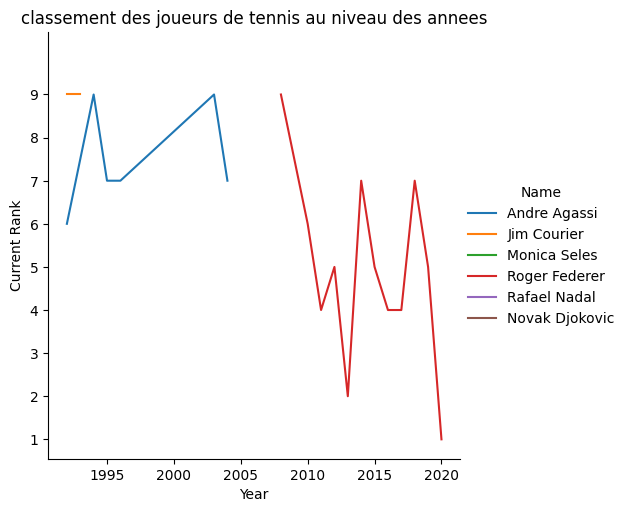

In [50]:
sns.relplot(
    data=tennis_players,
    x='Year',
    y='Current Rank',hue='Name',kind="line")
plt.title('classement des joueurs de tennis au niveau des annees')
plt.yticks(range(1,10,1))
plt.show()

nous allons evaluer l'evolution du reveu par sport au cours des annees

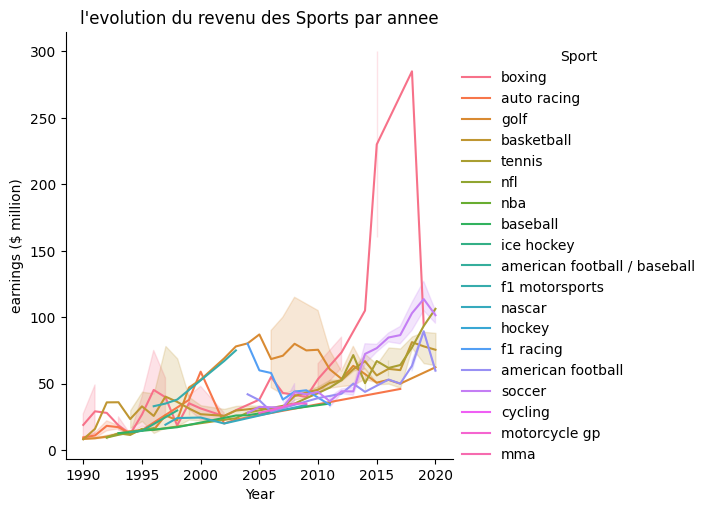

In [52]:
sns.relplot(
    data=salaires_athletes,
    x='Year',
    y='earnings ($ million)',hue='Sport',kind="line")
plt.title("l'evolution du revenu des Sports par annee")
plt.show()

In [53]:
sport_choisis=salaires_athletes[(salaires_athletes['Sport']=='boxing') | (salaires_athletes['Sport']=='basketball') ]
sport_choisis

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1
...,...,...,...,...,...,...,...
290,Stephen Curry,USA,9,8,basketball,2019,79.8
291,Kevin Durant,USA,10,11,basketball,2019,65.4
296,LeBron James,USA,5,8,basketball,2020,88.2


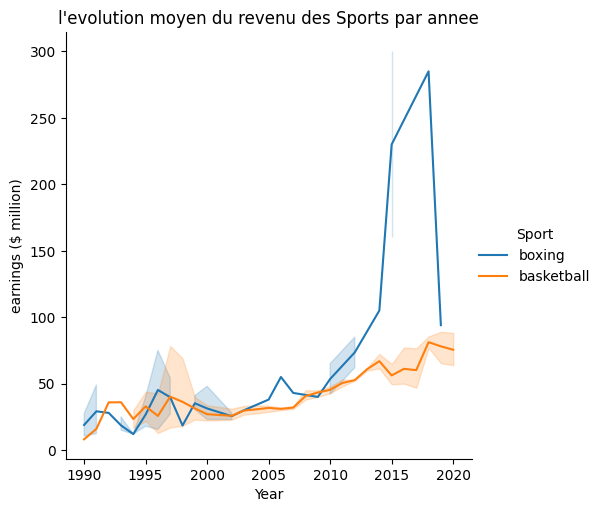

In [57]:
sns.relplot(
    data=sport_choisis,
    x='Year',
    y='earnings ($ million)',hue='Sport',kind="line")
plt.title("l'evolution moyen du revenu des Sports par annee")
plt.show()

In [56]:
salaires_athletes.groupby(['Sport','Year'])['earnings ($ million)'].mean().sort_values()

Sport        Year
basketball   1990      8.100000
golf         1990      8.400000
             1991      8.900000
auto racing  1990      9.500000
tennis       1992      9.500000
                        ...    
boxing       2014    105.000000
tennis       2020    106.300000
soccer       2019    113.666667
boxing       2015    230.000000
             2018    285.000000
Name: earnings ($ million), Length: 176, dtype: float64